# <span style = "font-style:italic;color:skyblue"> CAPSTONE PROJECT GROUP 2 <span>

# <span style = "font-style:italic;color:skyblue"> GROUP MEMBERS : <span>

1. **`DIVYA SHRUTHI J S`**
2. **`PADDA KAVITHA JANAKI`**
3. **`PRANAVAN C`**
4. **`SHRI VISHNU VELAN A K`**
5. **`SYED MOHASIN K`**

# <span style = "font-style:italic;color:skyblue"> TOPICS : <span>
1. **[`Dataset Description`](#dd)**
2. **[`Required Libraries`](#rl)**    
3. **[`Dataset`](#ds)**
4. **[`Basic Analysis`](#ba)**<br>
        4.1 **[`Shape`](#sh)**<br>
        4.2 **[`Size`](#si)**<br>
        4.3 **[`Duplicates`](#dup)**<br>
        4.4 **[`Data Types`](#dt)**<br>
        4.5 **[`functions`](#f)**<br>
        4.6 **[`Data Cleaning`](#dc)**<br>
5. **[`Missing Value Analysis`](#mva)** 
6. **[`Visualization`](#v)**    
7. **[`Outlier Treatment`](#ot)**    
        
8. **[`Statistical Analysis`](#sa)**<br>
        8.1 **[`Describe`](#de)**<br>
        8.2 **[`Skewness`](#sk)**<br>
        8.3 **[`Kurtosis`](#ku)**<br>
        8.4 **[`Hypothesis Testing`](#hyp)**
9. **[`Model Building`](#mbd)**<br>
        9.1 **[`Encoding Target Variables`](#etv)**<br>
        9.2 **[`Drop Unnecessary Columns`](#dcl)**<br>
        9.3 **[`Encoding Categorical Columns`](#ecc)**<br>
        9.4 **[`Base Model`](#bml)**<br>
        9.5 **[`Feature Importance`](#fi)**<br>
        9.6 **[`Multi Collinearity Checking`](#mclc)**

<a id = "dd"></a>
# <span style = "font-style:italic;color:skyblue"> DATASET DESCRIPTION : <span>

<span style = "font-style:italic;color:red">**`ID`**<span> -- Represents a unique identification of an entry<br>
**`Customer_ID`** -- Represents a unique identification of a person<br>
**`Month`** -- Represents the month of the year<br>
**`Name`** -- Represents the name of a person<br>
**`Age`** -- Represents the age of the person<br>
**`SSN`** -- Represents the social security number of a person<br>
**`Occupation`** -- Represents the occupation of the person<br>
**`Annual_Income`** -- Represents the annual income of the person<br>
**`Monthly_Inhand_Salary`** -- Represents the monthly base salary of a person<br>
**`Num_Bank_Accounts`** -- Represents the number of bank accounts a person holds<br>
**`Num_Credit_Card`** -- Represents the number of other credit cards held by a person<br>
**`Interest_Rate`** -- Represents the interest rate on credit card<br>
**`Num_of_Loan`** -- Represents the number of loans taken from the bank<br>
**`Type_of_Loan`** -- Represents the types of loan taken by a person<br>
**`Delay_from_due_date`** -- Represents the average number of days delayed from the payment date<br>
**`Num_of_Delayed_Payment`** -- Represents the average number of payments delayed by a person<br><br>
**`Changed_Credit_Limit`** -- Represents the percentage change in credit card limit<br>
**`Num_Credit_Inquiries`** -- Represents the number of credit card inquiries<br>
**`Credit_Mix`** -- Represents the classification of the mix of credits<br>
**`Outstanding_Debt`** -- Represents the remaining debt to be paid (in USD)<br>
**`Credit_Utilization_Ratio`** -- Represents the utilization ratio of credit card<br>
**`Credit_History_Age`** -- Represents the age of credit history of the person<br>
**`Payment_of_Min_Amount`** -- Represents whether only the minimum amount was paid by the person<br>
**`Total_EMI_per_month`** -- Represents the monthly EMI payments (in USD)<br>
**`Amount_invested_monthly`** -- Represents the monthly amount invested by the customer (in USD)<br>
**`Payment_Behaviour`** -- Represents the payment behaviour of the customer (in USD)<br>
**`Monthly_Balance`** -- Represents the monthly balance amount of the customer (in USD)<br>
#### Dependent Variable:<br>
<span style = "font-style:italic;color:red">**`Credit_Score`**<span> -- Represents the bracket of credit score (Poor, Standard, Good)<br>

<a id = "rl"></a>
# <span style = "font-style:italic;color:skyblue"> REQUIRED LIBRARIES : <span>

In [1]:
import pandas as pd

import numpy as np

from warnings import filterwarnings
filterwarnings("ignore")

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px

from scipy.stats import shapiro

from scipy.stats import levene

from scipy.stats import f_oneway

from scipy.stats import chi2_contingency

import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report

from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import GradientBoostingClassifier


<a id = "ds"></a>
# <span style = "font-style:italic;color:skyblue"> DATASET : <span>

In [2]:
credit_card = pd.read_csv("train.csv")
credit_card.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

<a id = "ba"></a>
# <span style = "font-style:italic;color:skyblue"> BASIC ANALYSIS : <span>

<a id = "sh"></a>
## <span style = "font-style:italic;color:black"> SHAPE <span>

In [3]:
# by using ".shape" we can get the number of rows and number of columns presented in the dataset

In [3]:
print(f' The number of rows = {credit_card.shape[0]} and the number of columns = {credit_card.shape[1]}')

 The number of rows = 100000 and the number of columns = 28


<a id = "si"></a>
## <span style = "font-style:italic;color:black"> SIZE <span>

In [4]:
# by using ".size" we can get the total number of value presented in the dataset or product of number of rows and columns

In [5]:
credit_card.size

2800000

<a id = "dup"></a>
## <span style = "font-style:italic;color:black"> DUPLICATES <span>

In [6]:
credit_card.duplicated().any()

False

In [7]:
# here there is no duplicate values presented in our dataset.

<a id = "dt"></a>
## <span style = "font-style:italic;color:black"> DATA TYPES <span>

In [8]:
# by using ".dtypes" we can get the data tpes of each variables(columns) presented in the dataset

In [9]:
credit_card.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [10]:
# by using ".info" we can get the datatypes of each variables and also we can get the number of not null values presented in the dataset

In [11]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [12]:
# from this we can able to see some numerical column's dtypes in the form of object so we are going to change it.

<a id = "f"></a>
## <span style = "font-style:italic;color:black"> FUNCTIONS <span>

In [13]:
def clean_and_convert_to_int(df, column_name):
    """
    Clean a column in a DataFrame by removing non-numeric characters and convert it to integers.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column to be cleaned and converted.
    - column_name: str
        The name of the column to be cleaned and converted.
    
    Returns:
    - DataFrame or None:
        The DataFrame with the specified column cleaned and converted to integers,
        or None if the column does not exist in the DataFrame.
    """
    # Check if the specified column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return None
    
    # Check if the column contains any non-numeric characters
    if pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Column '{column_name}' is already numeric.")
    else:
        # Convert the column to strings and remove non-numeric characters
        df[column_name] = df[column_name].astype(str).str.replace(r'\D', '')
    
    # Convert the cleaned column to integers
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce', downcast='integer')
    
    return df


In [14]:
def remove_and_convert_to_int(df, column_name):
    """
    Clean a column in a DataFrame by removing non-numeric characters and convert it to integers.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column to be cleaned and converted.
    - column_name: str
        The name of the column to be cleaned and converted.
    
    Returns:
    - DataFrame or None:
        The DataFrame with the specified column cleaned and converted to integers,
        or None if the column does not exist in the DataFrame.
    - int: The number of missing values (NaN) introduced by replacing underscores.
    """
    # Check if the specified column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return None, None
    
    # Replace '_' with NaN values
    num_missing_values = df[column_name].str.count('_').sum()
    df[column_name] = df[column_name].replace('_', np.nan)
    
    # Check if the column contains any non-numeric characters
    if pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Column '{column_name}' is already numeric.")
    else:
        # Convert the column to strings and remove non-numeric characters
        df[column_name] = df[column_name].astype(str).str.replace(r'\D', '')
    
    # Convert the cleaned column to integers
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce', downcast='integer')
    
    return df, num_missing_values

In [15]:
def fill_nan_with_mode(df, column_name, groupby_column):
    """
    Fill NaN values in a column with the mode values grouped by another column.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column with NaN values.
    - column_name: str
        The name of the column with NaN values to be filled.
    - groupby_column: str
        The name of the column to group by for calculating mode values.
    
    Returns:
    - DataFrame:
        The DataFrame with NaN values in the specified column filled with mode values.
    """
    # Calculate mode values within each group
    mode_values = df.groupby(groupby_column)[column_name].transform(lambda x: x.mode().iloc[0])
    
    # Fill NaN values with mode values
    df[column_name] = df[column_name].fillna(mode_values)
    
    return df

In [16]:
def replace_values_with_mode(df, column_name, groupby_column):
    """
    replace values in a column with the mode values grouped by another column.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column with mismatch values.
    - column_name: str
        The name of the column with mismatch values are changed.
    - groupby_column: str
        The name of the column to group by for calculating mode values.
    
    Returns:
    - DataFrame:
        The DataFrame with mismatch values in the specified column filled with mode values.
    """
    # Calculate mode values within each group
    df[column_name] = df.groupby(groupby_column)[column_name].transform(lambda x: x.mode().iloc[0])
    return df

In [17]:
def fill_nan_with_median(df, column_name, groupby_column):
    """
    Fill NaN values in a column with the median values grouped by another column.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column with NaN values.
    - column_name: str
        The name of the column with NaN values to be filled.
    - groupby_column: str
        The name of the column to group by for calculating median values.
    
    Returns:
    - DataFrame:
        The DataFrame with NaN values in the specified column filled with median values.
    """
    # Calculate median values within each group
    median_values = df.groupby(groupby_column)[column_name].transform('median')
    
    # Fill NaN values with median values
    df[column_name] = df[column_name].fillna(median_values)
    
    return df

In [18]:
def remove_and_convert_to_str(df, column_name):
    """
    Replace underscore values with NaN in a categorical column of a DataFrame.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column with underscore values.
    - column_name: str
        The name of the categorical column in which underscores should be replaced with NaN.
    
    Returns:
    - DataFrame:
        The DataFrame with underscore values replaced with NaN in the specified column.
    """
    # Replace underscore values with NaN
    df[column_name] = df[column_name].replace('_', np.nan)
    
    return df

In [19]:
def remove_and_convert_to_nan(df, column_name):
    """
    Replace underscore values with NaN in a categorical column of a DataFrame.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column with underscore values.
    - column_name: str
        The name of the categorical column in which underscores should be replaced with NaN.
    
    Returns:
    - DataFrame:
        The DataFrame with underscore values replaced with NaN in the specified column.
    """
    # Replace underscore values with NaN
    df[column_name] = df[column_name].replace('_______', np.nan)
    
    return df

In [20]:
def remove_symbol_and_convert_to_nan(df, column_name):
    """
    Replace underscore values with NaN in a categorical column of a DataFrame.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column with underscore values.
    - column_name: str
        The name of the categorical column in which underscores should be replaced with NaN.
    
    Returns:
    - DataFrame:
        The DataFrame with underscore values replaced with NaN in the specified column.
    """
    # Replace underscore values with NaN
    df[column_name] = df[column_name].replace('!@9#%8', np.nan)
    
    return df

In [21]:
def convert_to_numerical_age(df, column_name):
    """
    Convert values in a column containing years and months to a numerical value.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column to be converted.
    - column_name: str
        The name of the column to be converted.
    
    Returns:
    - DataFrame:
        The DataFrame with the values in the specified column converted to a numerical format.
    """
    # Extract years and months using regular expressions
    years = df[column_name].str.extract(r'(\d+) Years?').astype(float)
    months = df[column_name].str.extract(r'(\d+) Months?').astype(float)
    
    # Calculate total duration in years with a fractional part for the months
    df[column_name] = years + (months / 12)
    
    return df

In [22]:
def replace_negatives_and_above_threshold(df , column , i):
    
    df[column] = df[column].apply(lambda x: np.nan if x < 0 or x > i else x)
    
    return df

In [23]:
def remove_underage_groups(df , column):
    # Identify Customer_IDs with all ages less than 18
    underage_ids = df.groupby('Customer_ID')[column].apply(lambda x: (x < 18).all())
    
    # Get the Customer_IDs where all ages are less than 18
    underage_customer_ids = underage_ids[underage_ids].index
    
    # Drop rows associated with Customer_IDs where all ages are less than 18
    df.drop(df[df['Customer_ID'].isin(underage_customer_ids)].index , inplace = True)
    
    return df

In [24]:
def remove_none_type_loan(df , column):
    # Identify Customer_IDs with all type of loans is null
    none_type = df.groupby('Customer_ID')[column].apply(lambda x: x.isna().all())
    
    # Get the Customer_IDs where all type of loans is null
    none_type_customer_ids = none_type[none_type].index
    
    # Drop rows associated with Customer_IDs where all type of loans is null
    df.drop(df[df['Customer_ID'].isin(none_type_customer_ids)].index , inplace = True)
    
    return df

In [25]:
def process_column(df , column , i):
    # Convert negative values to positive
    df[column] = df[column].apply(lambda x: abs(x))
    
    # Convert values greater than i to NaN
    df[column] = df[column].apply(lambda x: np.nan if x > i else x)
    
    return df

In [26]:
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data.sort_values(by = "VIF" , ascending= False)

In [186]:
def calculate_f1_score(model, model_name, f1_score_model):
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate F1-score for the model
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append the F1-score to the DataFrame
    f1_score_model = f1_df.append({'Model': model_name, 'F1-score': f1}, ignore_index=True)
    
    return f1_score_model

<a id = "dc"></a>
## <span style = "font-style:italic;color:black"> DATA CLEANING <span>

In [28]:
# here we are going to data cleaning on each and every columns those are having different dtypes

In [29]:
clean_and_convert_to_int(credit_card , "Age")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0               _            809.98                26.822620   
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
99995           _            502.38                34.663572   
99996           _            502.38                40.565631   
99997        Good            502.38                41.255522   
99998        Good            502.38                33.638208   
99999        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...                         

In [30]:
credit_card.Age.describe()

count    95061.000000
mean       110.934505
std        689.407864
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

In [31]:
# From this we can see that we have negative values and huge values in the Age variables

In [32]:
num_negative_values = (credit_card["Age"] < 18).sum()
num_very_large_values = (credit_card["Age"] > 60).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 6319
Number of very large values: 1810


In [33]:
clean_and_convert_to_int(credit_card , "Annual_Income")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic            NaN            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...             

In [34]:
credit_card.Annual_Income.describe()

count    9.302000e+04
mean     1.785790e+05
std      1.442878e+06
min      7.005930e+03
25%      1.943560e+04
50%      3.755074e+04
75%      7.284338e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

<span style = font-style:bold;color:blue>here out max annual salary is 24 Millions so we need to group by the customer id and check the value whether it is correct or not<span>

<span style = font-style:bold;color:blue>**`Annual_Income`**<span> : Replacing the mismatched values  with the mode grouped by customer id.

In [35]:
replace_values_with_mode(credit_card , "Annual_Income" , "Customer_ID")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...             

In [36]:
credit_card.Annual_Income.describe()

count    100000.000000
mean      50505.123449
std       38299.422093
min        7005.930000
25%       19342.972500
50%       36999.705000
75%       71683.470000
max      179987.280000
Name: Annual_Income, dtype: float64

<span style = font-style:bold;color:blue>**`Num_Bank_Accounts`**<span> : Replacing the mismatched values  with the mode grouped by customer id.

In [37]:
credit_card.Num_Bank_Accounts.describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

<span style = font-style:bold;color:blue>here our max number of bank accounts  is 1798 so we need to group by the customer id and try to change the mismatched values<span>

In [38]:
replace_values_with_mode(credit_card , "Num_Bank_Accounts" , "Customer_ID")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...             

In [39]:
credit_card.Num_Bank_Accounts.describe()

count    100000.000000
mean          5.367520
std           2.593321
min          -1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: Num_Bank_Accounts, dtype: float64

<span style = font-style:bold;color:blue>**`Num_Credit_Card`**<span> : Replacing the mismatched values  with the mode grouped by customer id.

In [40]:
credit_card.Num_Credit_Card.describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

<span style = font-style:bold;color:blue>here our max number of Credit cards  are 1499 so we need to group by the customer id and try to change the mismatched values<span>

In [41]:
replace_values_with_mode(credit_card , "Num_Credit_Card" , "Customer_ID")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...             

In [42]:
credit_card.Num_Credit_Card.describe()

count    100000.000000
mean          5.532720
std           2.067504
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64

<span style = font-style:bold;color:blue>**`Interest_Rate`**<span> : Replacing the mismatched values  with the mode grouped by customer id.

In [43]:
credit_card.Interest_Rate.describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

<span style = font-style:bold;color:blue>here our max Interest rate looks 5797% so we need to group by the customer id and try to change the mismatched values<span>

In [44]:
replace_values_with_mode(credit_card , "Interest_Rate" , "Customer_ID")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...             

In [45]:
credit_card.Num_Credit_Card.describe()

count    100000.000000
mean          5.532720
std           2.067504
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64

<span style = font-style:bold;color:blue>**`Total_EMI_per_month`**<span> : Replacing the mismatched values  with the mode grouped by customer id.

In [46]:
credit_card.Total_EMI_per_month.describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

<span style = font-style:bold;color:blue>here our max Total EMI per month looks 82331 so we need to group by the customer id and try to change the mismatched values<span>

In [47]:
replace_values_with_mode(credit_card , "Total_EMI_per_month" , "Customer_ID")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...             

In [48]:
credit_card.Total_EMI_per_month.describe()

count    100000.000000
mean        105.543371
std         125.810030
min           0.000000
25%          29.049047
50%          66.033915
75%         145.582332
max        1779.103254
Name: Total_EMI_per_month, dtype: float64

In [49]:
clean_and_convert_to_int(credit_card , "Num_of_Loan")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...           _            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...           _            502.38                 34.663572   
99996  ...           _            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ... 

In [50]:
credit_card.Num_of_Loan.describe()

count    95215.000000
mean         2.780339
std         62.500940
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

In [51]:
clean_and_convert_to_int(credit_card , "Num_of_Delayed_Payment")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...           _            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...           _            502.38                 34.663572   
99996  ...           _            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1                         NaN                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...                       ...                    ...                  ...   
99995   31 Years and 6 Months                     No            35.104023   
99996   31 Years and 7 Months                     No            35.104023   
99997   31 Years and 8 Months                     No            35.104023   
99998   31 Years and 9 Months                     No            35.104023   
99999  31 Years and 10 Months                     No            35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...               

In [52]:
credit_card.Num_of_Delayed_Payment.describe()

count    90254.000000
mean        31.033051
std        226.955758
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [53]:
clean_and_convert_to_int(credit_card , "Outstanding_Debt")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...           _            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...           _            502.38                 34.663572   
99996  ...           _            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1                         NaN                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...                       ...                    ...                  ...   
99995   31 Years and 6 Months                     No            35.104023   
99996   31 Years and 7 Months                     No            35.104023   
99997   31 Years and 8 Months                     No            35.104023   
99998   31 Years and 9 Months                     No            35.104023   
99999  31 Years and 10 Months                     No            35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...               

In [54]:
credit_card.Outstanding_Debt.describe()

count    98991.000000
mean      1426.503700
std       1155.045753
min          0.230000
25%        566.080000
50%       1166.370000
75%       1948.200000
max       4998.070000
Name: Outstanding_Debt, dtype: float64

In [55]:
clean_and_convert_to_int(credit_card , "Amount_invested_monthly")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...           _            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...           _            502.38                 34.663572   
99996  ...           _            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1                         NaN                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...                       ...                    ...                  ...   
99995   31 Years and 6 Months                     No            35.104023   
99996   31 Years and 7 Months                     No            35.104023   
99997   31 Years and 8 Months                     No            35.104023   
99998   31 Years and 9 Months                     No            35.104023   
99999  31 Years and 10 Months                     No            35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                   80.415295   High_spent_Small_value_payments   
1                  118.280222    Low_spent_Large_value_payments   
2                   81.699521   Low_spent_Medium_value_payments   
3                  199.458074    Low_spent_Small_value_payments   
4                   41.420153  High_spent_Medium_value_payments   
...               

In [56]:
credit_card.Amount_invested_monthly.describe()

count    91216.000000
mean       195.539456
std        199.564527
min          0.000000
25%         72.236692
50%        128.954538
75%        236.815814
max       1977.326102
Name: Amount_invested_monthly, dtype: float64

In [57]:
clean_and_convert_to_int(credit_card , "Monthly_Balance")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...           _            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...           _            502.38                 34.663572   
99996  ...           _            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1                         NaN                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...                       ...                    ...                  ...   
99995   31 Years and 6 Months                     No            35.104023   
99996   31 Years and 7 Months                     No            35.104023   
99997   31 Years and 8 Months                     No            35.104023   
99998   31 Years and 9 Months                     No            35.104023   
99999  31 Years and 10 Months                     No            35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                   80.415295   High_spent_Small_value_payments   
1                  118.280222    Low_spent_Large_value_payments   
2                   81.699521   Low_spent_Medium_value_payments   
3                  199.458074    Low_spent_Small_value_payments   
4                   41.420153  High_spent_Medium_value_payments   
...               

In [58]:
credit_card.Monthly_Balance.describe()

count    98791.000000
mean       402.551258
std        213.925499
min          0.007760
25%        270.106630
50%        336.731225
75%        470.262938
max       1602.040519
Name: Monthly_Balance, dtype: float64

In [59]:
remove_and_convert_to_int(credit_card , "Changed_Credit_Limit")

(            ID Customer_ID     Month           Name    Age          SSN  \
 0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
 1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
 2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
 3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
 4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
 ...        ...         ...       ...            ...    ...          ...   
 99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
 99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
 99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
 99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
 99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   
 
       Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
 0      

In [60]:
credit_card.Changed_Credit_Limit.value_counts()

Changed_Credit_Limit
 8.22     133
 11.50    127
 11.32    126
 10.06    121
 7.35     121
         ... 
 31.56      1
 32.56      1
 20.66      1
-0.72       1
 21.17      1
Name: count, Length: 4375, dtype: int64

In [61]:
credit_card.Changed_Credit_Limit.describe()

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

In [62]:
credit_card.Credit_Mix.value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [63]:
credit_card.groupby(["Customer_ID" , "Credit_Mix"])["Credit_Mix"].count()

Customer_ID  Credit_Mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      5
             _             3
CUS_0x100b   Good          7
             _             1
                          ..
CUS_0xff6    _             1
CUS_0xffc    Bad           6
             _             2
CUS_0xffd    Standard      6
             _             2
Name: Credit_Mix, Length: 22977, dtype: int64

In [64]:
remove_and_convert_to_str(credit_card , "Credit_Mix")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...         NaN            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...         NaN            502.38                 34.663572   
99996  ...         NaN            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1                         NaN                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...                       ...                    ...                  ...   
99995   31 Years and 6 Months                     No            35.104023   
99996   31 Years and 7 Months                     No            35.104023   
99997   31 Years and 8 Months                     No            35.104023   
99998   31 Years and 9 Months                     No            35.104023   
99999  31 Years and 10 Months                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...         

In [65]:
credit_card.Credit_Mix.value_counts()

Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64

In [66]:
credit_card.groupby(["Customer_ID" , "Credit_Mix"])["Credit_Mix"].count()

Customer_ID  Credit_Mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      5
CUS_0x100b   Good          7
CUS_0x1011   Standard      8
CUS_0x1013   Good          7
                          ..
CUS_0xff3    Good          6
CUS_0xff4    Standard      6
CUS_0xff6    Good          7
CUS_0xffc    Bad           6
CUS_0xffd    Standard      6
Name: Credit_Mix, Length: 12500, dtype: int64

In [67]:
credit_card.Occupation.value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [68]:
credit_card.groupby(["Customer_ID" , "Occupation"])["Occupation"].count()

Customer_ID  Occupation   
CUS_0x1000   Lawyer           8
CUS_0x1009   Mechanic         7
             _______          1
CUS_0x100b   Media_Manager    8
CUS_0x1011   Doctor           8
                             ..
CUS_0xff6    Doctor           8
CUS_0xffc    Musician         7
             _______          1
CUS_0xffd    Scientist        7
             _______          1
Name: Occupation, Length: 18050, dtype: int64

In [69]:
remove_and_convert_to_nan(credit_card , "Occupation")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...         NaN            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...         NaN            502.38                 34.663572   
99996  ...         NaN            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1                         NaN                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...                       ...                    ...                  ...   
99995   31 Years and 6 Months                     No            35.104023   
99996   31 Years and 7 Months                     No            35.104023   
99997   31 Years and 8 Months                     No            35.104023   
99998   31 Years and 9 Months                     No            35.104023   
99999  31 Years and 10 Months                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...         

In [70]:
credit_card.Occupation.value_counts()

Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [71]:
convert_to_numerical_age(credit_card , "Credit_History_Age")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...         NaN            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...         NaN            502.38                 34.663572   
99996  ...         NaN            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
9999

In [72]:
credit_card.Credit_History_Age

0        22.083333
1              NaN
2        22.250000
3        22.333333
4        22.416667
           ...    
99995    31.500000
99996    31.583333
99997    31.666667
99998    31.750000
99999    31.833333
Name: Credit_History_Age, Length: 100000, dtype: float64

In [73]:
credit_card.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [74]:
remove_symbol_and_convert_to_nan(credit_card , "Payment_Behaviour")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...         NaN            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...         NaN            502.38                 34.663572   
99996  ...         NaN            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
9999

In [75]:
credit_card.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

<a id = "mva"></a>
# <span style = "font-style:italic;color:skyblue"> MISSING VALUE ANALYSIS <span>

In [76]:
credit_card.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                          4939
SSN                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

<span style = font-style:bold;color:blue>**`Changed_Credit_Limit`**<span> : filling the missing values  with the mode grouped by customer id.

In [77]:
credit_card.Changed_Credit_Limit.isna().sum()

2091

In [78]:
fill_nan_with_mode(credit_card, 'Changed_Credit_Limit', 'Customer_ID')

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...         NaN            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...         NaN            502.38                 34.663572   
99996  ...         NaN            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
9999

In [79]:
credit_card.Changed_Credit_Limit.isna().sum()

0

<span style = font-style:bold;color:blue>**`Credit_Mix`**<span> : filling the missing values  with the mode grouped by customer id.

In [80]:
credit_card.Credit_Mix.isna().sum()

20195

In [81]:
fill_nan_with_mode(credit_card, 'Credit_Mix', 'Customer_ID')

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
9999

In [82]:
credit_card.Credit_Mix.isna().sum()

0

<span style = font-style:bold;color:blue>**`Occupation`**<span> : filling the missing values  with the mode grouped by customer id.

In [83]:
credit_card.Occupation.isna().sum()

7062

In [84]:
fill_nan_with_mode(credit_card, 'Occupation', 'Customer_ID')

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
9999

In [85]:
credit_card.Occupation.isna().sum()

0

<span style = font-style:bold;color:blue>**`Payment_Behaviour`**<span> : filling the missing values  with the mode grouped by customer id.

In [86]:
credit_card.Payment_Behaviour.isna().sum()

7600

In [87]:
fill_nan_with_mode(credit_card, 'Payment_Behaviour', 'Customer_ID')

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
9999

In [88]:
credit_card.Payment_Behaviour.isna().sum()

0

<span style = font-style:italic;color:blue>**`Age`**<span>: we found a lot of wrongly input data; since the credit card cannot be issued for ages below 18 and above 60; we have taken into assumption the data points between these interval. within these intervals; we have imputed the missing values with the mode  grouped by customer id.

In [89]:
credit_card.Age.isna().sum()

4939

In [90]:
num_negative_values = (credit_card["Age"] < 18).sum()
num_very_large_values = (credit_card["Age"] > 60).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 6319
Number of very large values: 1810


In [91]:
replace_negatives_and_above_threshold(credit_card , "Age" , 60)

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh   NaN  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [92]:
fill_nan_with_mode(credit_card, 'Age', 'Customer_ID')

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [93]:
num_negative_values = (credit_card["Age"] < 18).sum()
num_very_large_values = (credit_card["Age"] > 60).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 5882
Number of very large values: 0


In [94]:
remove_underage_groups(credit_card , "Age")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [95]:
num_negative_values = (credit_card["Age"] < 18).sum()
num_very_large_values = (credit_card["Age"] > 60).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 370
Number of very large values: 0


In [96]:
credit_card.Age.isna().sum()

0

#### <span style = font-style:italic;color:blue> **`no of loans`**: since there are values which is wrongly mentioned while data entry; we have taken the condition to be > 17 and replaced the values of the falsified data with the mode grouped by customer id.<span>

In [97]:
credit_card.Num_of_Loan.isna().sum()

4504

In [98]:
num_negative_values = (credit_card["Num_of_Loan"] < 0).sum()
num_very_large_values = (credit_card["Num_of_Loan"] > 16).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 3680
Number of very large values: 422


In [99]:
replace_negatives_and_above_threshold(credit_card , "Num_of_Loan" , 16)

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [100]:
fill_nan_with_mode(credit_card, 'Num_of_Loan', 'Customer_ID')

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [101]:
num_negative_values = (credit_card["Num_of_Loan"] < 0).sum()
num_very_large_values = (credit_card["Num_of_Loan"] > 10).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 0
Number of very large values: 0


In [102]:
credit_card.Num_of_Loan.isna().sum()

0

#### <span style = font-style:italic;color:blue>**`type of loan`**:  since there are blank rows with no data to even fill the missing values; we are removing those customers on entirety.<span>


In [103]:
credit_card.Type_of_Loan.isna().sum()

11256

In [104]:
remove_none_type_loan(credit_card , "Type_of_Loan")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [105]:
credit_card.Type_of_Loan.isna().sum()

0

#### no. of delayed payments: we found to issues with the data entered;<br> i) <span style = font-style:bold;color:blue>**`Had negative values`**<span> ; we changed the negative values to positive as number delayed payments cannot be negative.<br>
ii) <span style = font-style:bold;color:blue>**`since there are values which is wrongly mentioned while data entry`**<span> ; we have taken the condition to be > 28 and replaced the values of the falsified data with the mode grouped by customer id.

In [106]:
credit_card.Num_of_Delayed_Payment.isna().sum()

8129

In [107]:
num_negative_values = (credit_card["Num_of_Delayed_Payment"] < 0).sum()
num_very_large_values = (credit_card["Num_of_Delayed_Payment"] > 28).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 489
Number of very large values: 605


In [108]:
process_column(credit_card , "Num_of_Delayed_Payment" , 28)

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [109]:
credit_card.Num_of_Delayed_Payment.isna().sum()

8734

In [110]:
fill_nan_with_mode(credit_card , "Num_of_Delayed_Payment" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [111]:
credit_card.Num_of_Delayed_Payment.isna().sum()

0

<span style = font-style:bold;color:blue>**`no of credit enquires`**<span>: since there are values which is wrongly mentioned while data entry; <br>we have taken the condition to be > 17 and replaced the values of the falsified data with the mode grouped by customer id.

In [112]:
credit_card.Num_Credit_Inquiries.isna().sum()

1633

In [113]:
num_negative_values = (credit_card["Num_Credit_Inquiries"] < 0).sum()
num_very_large_values = (credit_card["Num_Credit_Inquiries"] > 17).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 0
Number of very large values: 1364


In [114]:
process_column(credit_card , "Num_Credit_Inquiries" , 17)

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [115]:
credit_card.Num_Credit_Inquiries.isna().sum()

2997

In [116]:
fill_nan_with_mode(credit_card , "Num_Credit_Inquiries" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [117]:
credit_card.Num_Credit_Inquiries.isna().sum()

0

<span style = font-style:bold;color:blue>**`outstanding debt`**<span> : filling the missing values  with the mode grouped by customer id.

In [118]:
credit_card.Outstanding_Debt.isna().sum()

857

In [119]:
fill_nan_with_mode(credit_card , "Outstanding_Debt" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [120]:
credit_card.Outstanding_Debt.isna().sum()

0

<span style = font-style:bold;color:blue>**`Annual_Income`**<span> : filling the missing values  with the mode grouped by customer id.

In [121]:
credit_card.Annual_Income.isna().sum()

0

In [122]:
fill_nan_with_mode(credit_card , "Annual_Income" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [123]:
credit_card.Annual_Income.isna().sum()

0

<span style = font-style:bold;color:blue>**`Monthly_Inhand_Salary`**<span> : filling the missing values  with the mode grouped by customer id.

In [124]:
credit_card.Monthly_Inhand_Salary.isna().sum()

12398

In [125]:
fill_nan_with_mode(credit_card , "Monthly_Inhand_Salary" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12            1824.843333                  3   
2      Scientist       19114.12            1824.843333                  3   
3      Scientist       19114.12            1824.843333                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [126]:
credit_card.Monthly_Inhand_Salary.isna().sum()

0

<span style = font-style:bold;color:blue>**`Amount invested monthly`**<span>: We are filling the missing values with the median grouped by customer_id. 
here,  we are not using the mean since we can see there is skewness in the data.

In [127]:
credit_card.Amount_invested_monthly.isna().sum()

7377

In [128]:
credit_card.Amount_invested_monthly.skew()

2.592283780771663

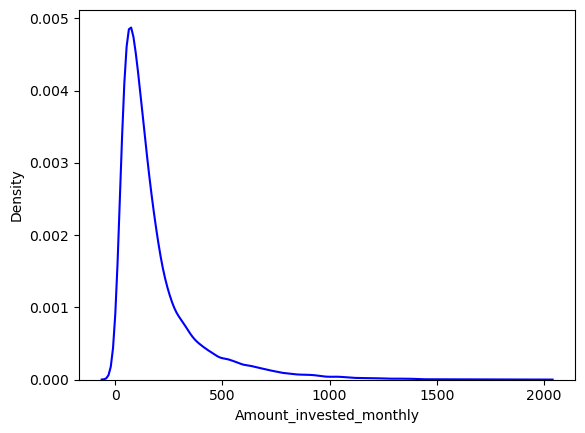

In [129]:
sns.distplot(credit_card.Amount_invested_monthly , hist= False , color= "blue")
plt.show()

In [130]:
fill_nan_with_median(credit_card , "Amount_invested_monthly" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12            1824.843333                  3   
2      Scientist       19114.12            1824.843333                  3   
3      Scientist       19114.12            1824.843333                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [131]:
credit_card.Amount_invested_monthly.isna().sum()

0

<span style = font-style:bold;color:blue>**`Monthly_Balance`**<span>: We are filling the missing values with the median grouped by customer_id. 
here,  we are not using the mean since we can see there is skewness in the data.

In [132]:
credit_card.Monthly_Balance.isna().sum()

1099

In [133]:
credit_card.Monthly_Balance.skew()

1.5875807511917193

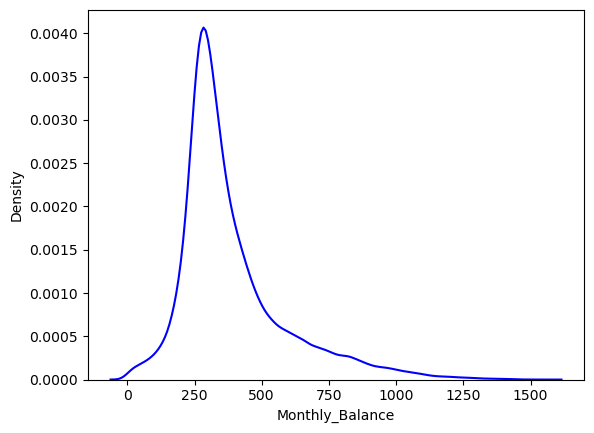

In [134]:
sns.distplot(credit_card.Monthly_Balance , hist= False , color= "blue")
plt.show()

In [135]:
fill_nan_with_median(credit_card , "Monthly_Balance" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12            1824.843333                  3   
2      Scientist       19114.12            1824.843333                  3   
3      Scientist       19114.12            1824.843333                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [136]:
credit_card.Monthly_Balance.isna().sum()

0

<span style = font-style:bold;color:blue>**`credit history age`**<span>: there are missing values present; since we see see a pattern in the number of months increasing; we use interpolate function to interpret the pattern and fill in the missing values.

In [137]:
credit_card.Credit_History_Age.isna().sum()

7573

In [138]:
# Fill NaN values using linear interpolation
credit_card['Credit_History_Age'] = credit_card['Credit_History_Age'].interpolate()
# Identify the pattern
pattern = np.diff(credit_card['Credit_History_Age'])

print("Pattern:", pattern)

Pattern: [0.08333333 0.08333333 0.08333333 ... 0.08333333 0.08333333 0.08333333]


In [139]:
credit_card.Credit_History_Age.isna().sum()

0

In [140]:
credit_card.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        8355
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [141]:
credit_card.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

#### <span style = font-style:bold;color:blue>we are dropping  `name`, `id` and  `ssn` columns because they have no dependency on the target variable.we are setting the column `Customer_ID` as index<span>

In [142]:
credit_card.drop(columns= ['ID' , 'Name' , 'SSN'] , inplace= True)

In [143]:
credit_card.set_index("Customer_ID" , inplace= True)

In [144]:
credit_card.head()

Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
Customer_ID                                                                    
CUS_0xd40     January  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40    February  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40       March  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40       April  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40         May  23.0  Scientist       19114.12            1824.843333   

             Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Customer_ID                                                                   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   

                                                  Type_of_Loan  ...  \
Customer_ID                                                     ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   

             Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
Customer_ID                                                           
CUS_0xd40          Good            809.98                 26.822620   
CUS_0xd40          Good            809.98                 31.944960   
CUS_0xd40          Good            809.98                 28.609352   
CUS_0xd40          Good            809.98                 31.377862   
CUS_0xd40          Good            809.98                 24.797347   

             Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
Customer_ID                                                                  
CUS_0xd40             22.083333                    No            49.574949   
CUS_0xd40             22.166667                    No            49.574949   
CUS_0xd40             22.250000                    No            49.574949   
CUS_0xd40             22.333333                    No            49.574949   
CUS_0xd40             22.416667                    No            49.574949   

             Amount_invested_monthly                 Payment_Behaviour  \
Customer_ID                                                              
CUS_0xd40                  80.415295   High_spent_Small_value_payments   
CUS_0xd40                 118.280222    Low_spent_Large_value_payments   
CUS_0xd40                  81.699521   Low_spent_Medium_value_payments   
CUS_0xd40                 199.458074    Low_spent_Small_value_payments   
CUS_0xd40                  41.420153  High_spent_Medium_value_payments   

            Monthly_Balance  Credit_Score  
Customer_ID                                
CUS_0xd40        312.494089          Good  
CUS_0xd40        284.629162          Good  
CUS_0xd40        331.209863          Good  
CUS_0xd40        223.451310          Good  
CUS_0xd40        341.489231          Good  

[5 rows x 24 columns]

<a id = "v"></a>
# <span style = "font-style:italic;color:skyblue"> VISUALIZATION <span>

<a id = "uv"></a>
## <span style = "font-style:italic;color:black"> UNIVARIATE <span>

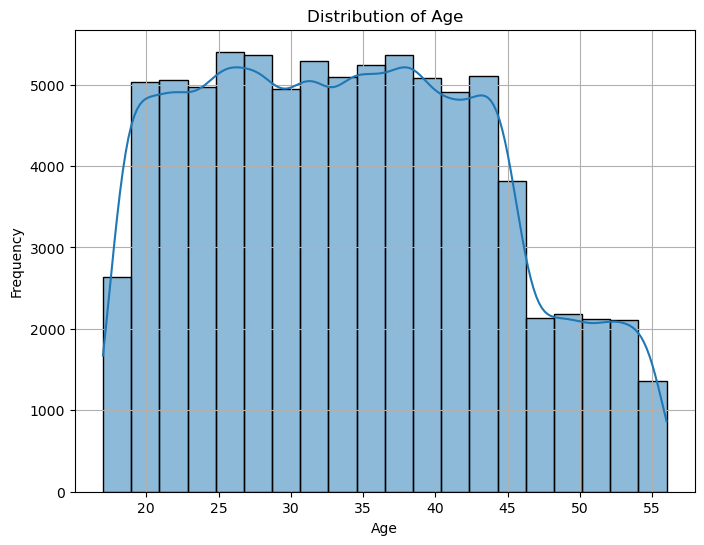

In [146]:
# Histogram for Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=credit_card, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('Distribution of Age.png')
plt.show()

#### <span style = font-style:bold;color:blue>we can see that there are **`more number of users`** using credit cards between the **`age 25 and 38`**. we see decline in the usage of credit card henceforth. here we have taken into consideration the age group between 18 and 60.<span>

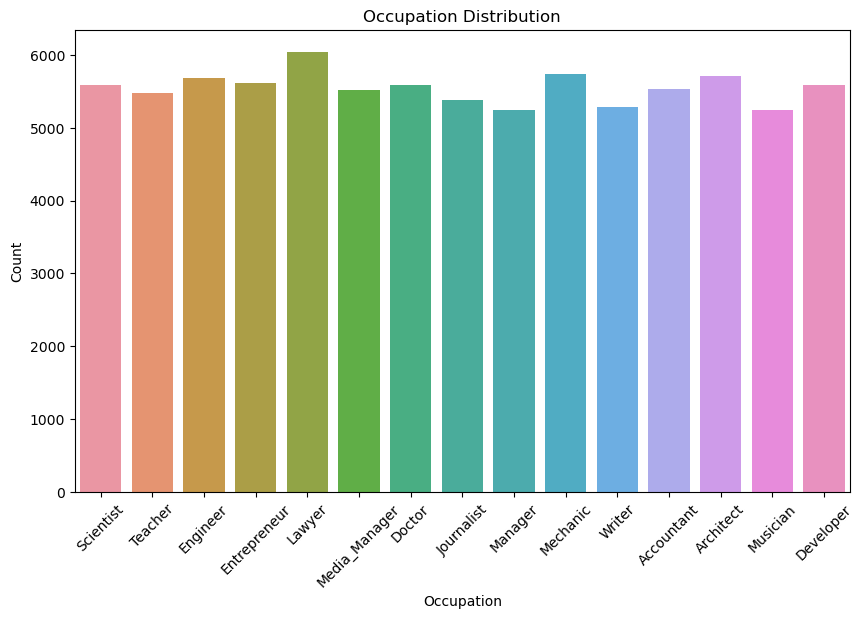

In [147]:
# Bar plot for Occupation
plt.figure(figsize=(10, 6))
sns.countplot(data=credit_card, x='Occupation')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('Occupation Distribution.png')
plt.show()

#### <span style = font-style:bold;color:blue>Here we can see that the **`most usage`** of credit cards are by lawyers. also all profession have an average of 5000 number of people using credit cards.<span>

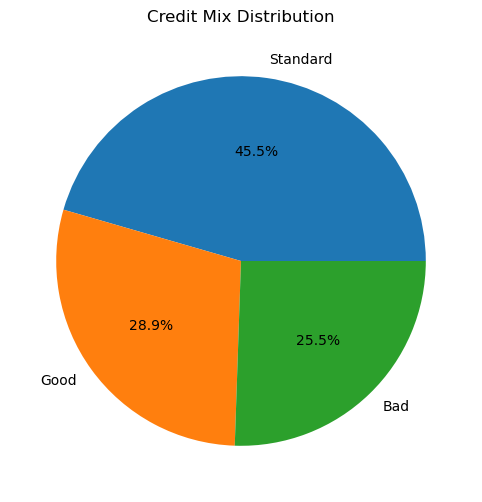

In [148]:
# Pie chart for Credit Mix
plt.figure(figsize=(8, 6))
credit_card['Credit_Mix'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Credit Mix Distribution')
plt.ylabel('')
plt.savefig('Credit Mix Distribution.png')
plt.show()

#### <span style = font-style:bold;color:blue>here we can see that there are 45.5%, 28.9% and 25.5% of people having standard, good and bad credit scores respectively.<br>and infer that **`more number of the people fall under standard`** category.<br>hence we can say they have better credit usage<span>

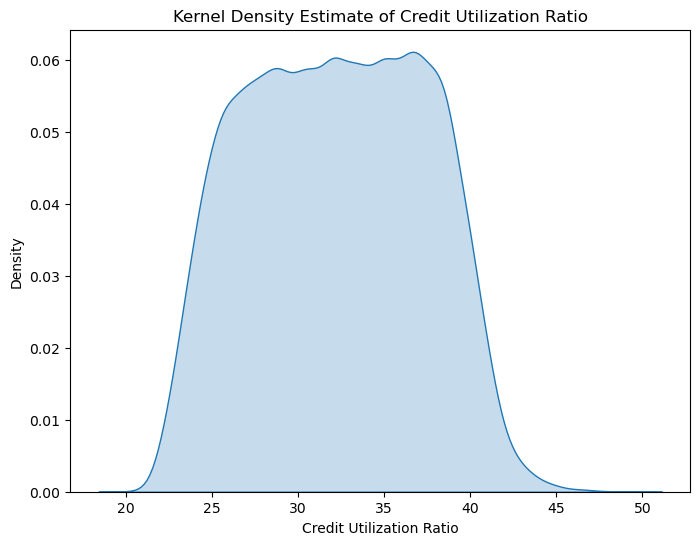

In [149]:
# Kernel Density Estimate (KDE) plot for Credit Utilization Ratio
plt.figure(figsize=(8, 6))
sns.kdeplot(data=credit_card['Credit_Utilization_Ratio'], shade=True)
plt.title('Kernel Density Estimate of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Density')
plt.savefig('Kernel Density Estimate of Credit Utilization Ratio.png')
plt.show()


#### <span style = font-style:bold;color:blue>we can see that the credit utilization ratio on an average is at 25% to 40%<span>

<a id = "biv"></a>
## <span style = "font-style:italic;color:black"> BIVARIATE <span>

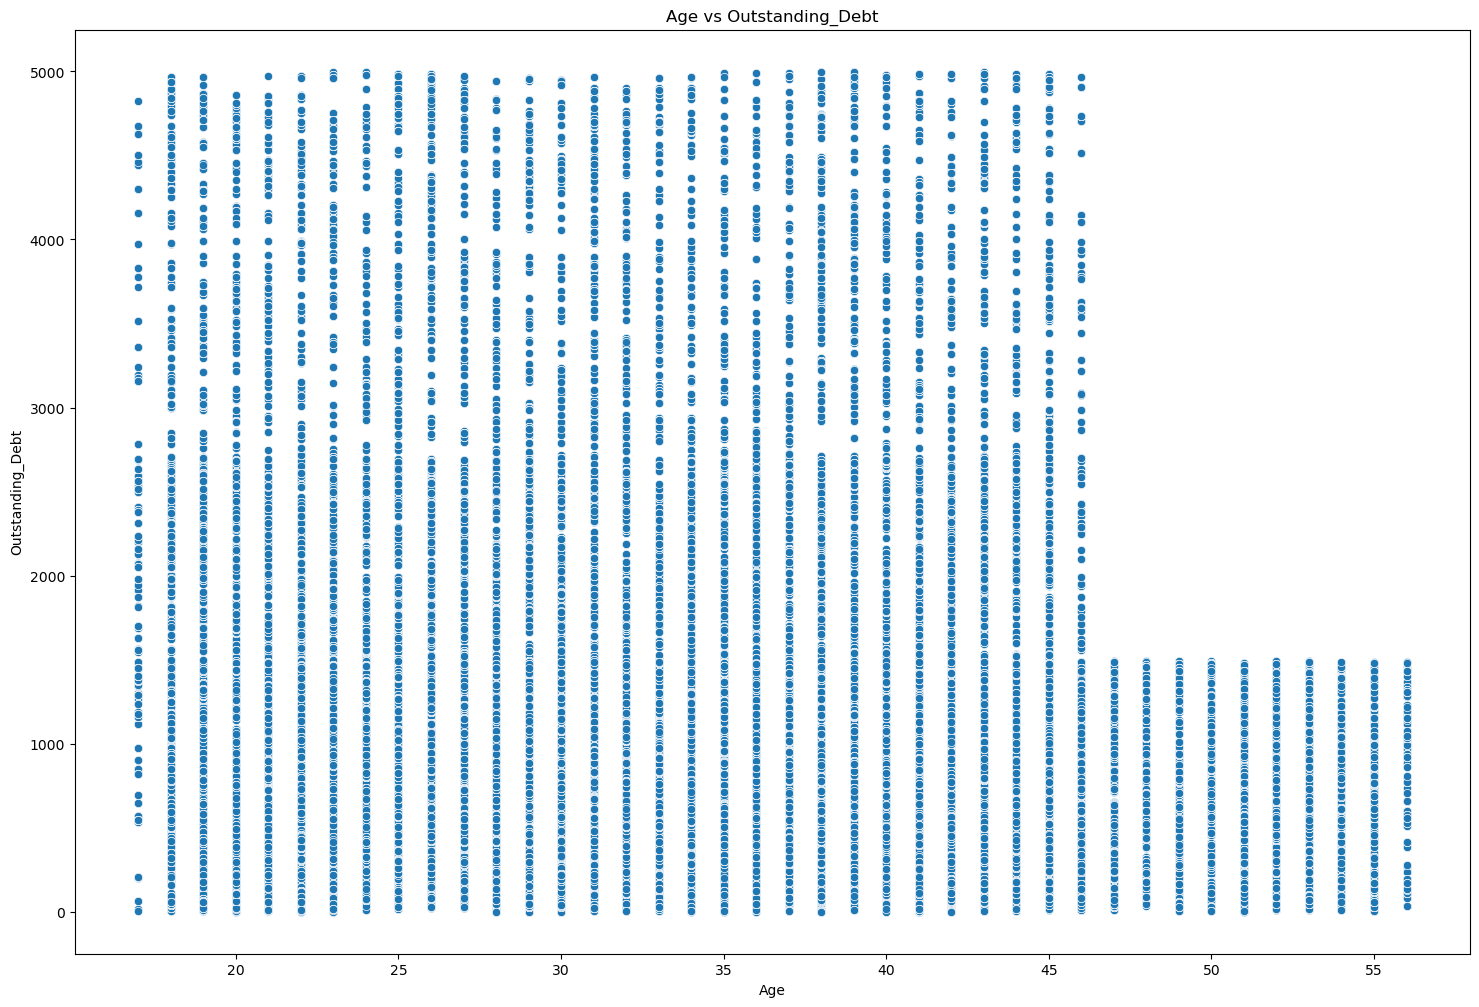

In [150]:
# Scatter plot for Age vs Monthly Inhand Salary
plt.figure(figsize=(18, 12))
sns.scatterplot(data=credit_card, x='Age', y='Outstanding_Debt')
plt.title('Age vs Outstanding_Debt')
plt.xlabel('Age')
plt.ylabel('Outstanding_Debt')
plt.savefig('Age vs Outstanding_Debt.png')
plt.show()

#### <span style = font-style:bold;color:blue>here we can infer that people **`below the age group of 42`** has an average outstanding debt of **`5000 dollars`**. after 42 the the outstanding debt of people have significantly reduced.<span>

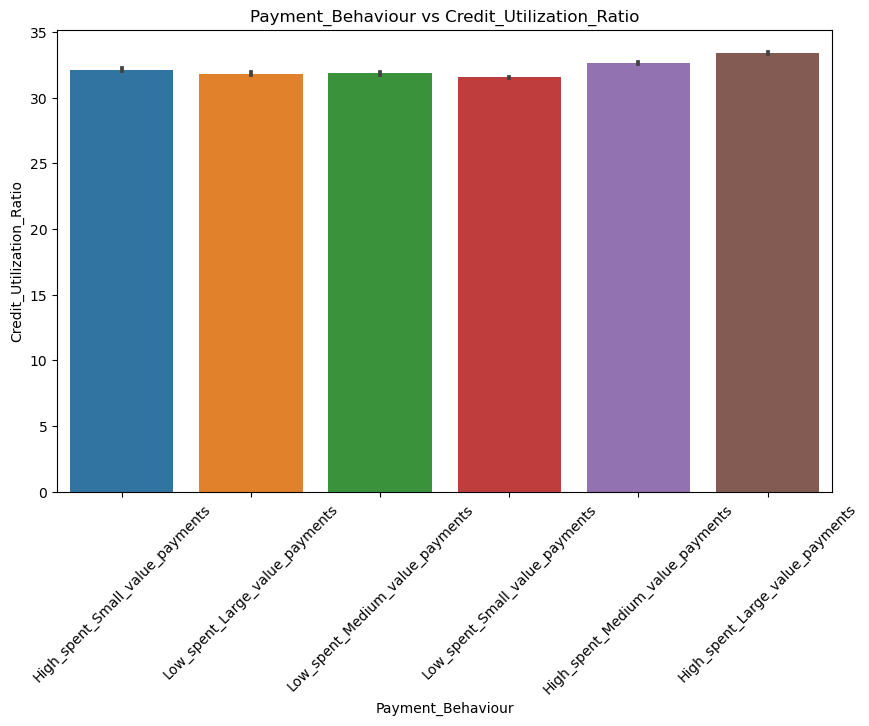

In [151]:
# Bar plot for Occupation vs Monthly Inhand Salary, grouped by Type of Loan
plt.figure(figsize=(10 , 6))
sns.barplot(data=credit_card, x='Payment_Behaviour', y='Credit_Utilization_Ratio')
plt.title('Payment_Behaviour vs Credit_Utilization_Ratio')
plt.xlabel('Payment_Behaviour')
plt.ylabel('Credit_Utilization_Ratio')
plt.xticks(rotation=45)
plt.savefig('Payment_Behaviour vs Credit_Utilization_Ratio.png')
plt.show()

#### <span style = font-style:bold;color:blue>here we can say that the group of people having the payment behavior as **`high_spent_large_value_payments`** have high credit utilization ratio of almost 34%.<span>

<a id = "muiv"></a>
## <span style = "font-style:italic;color:black"> MULTI VARIATE <span>

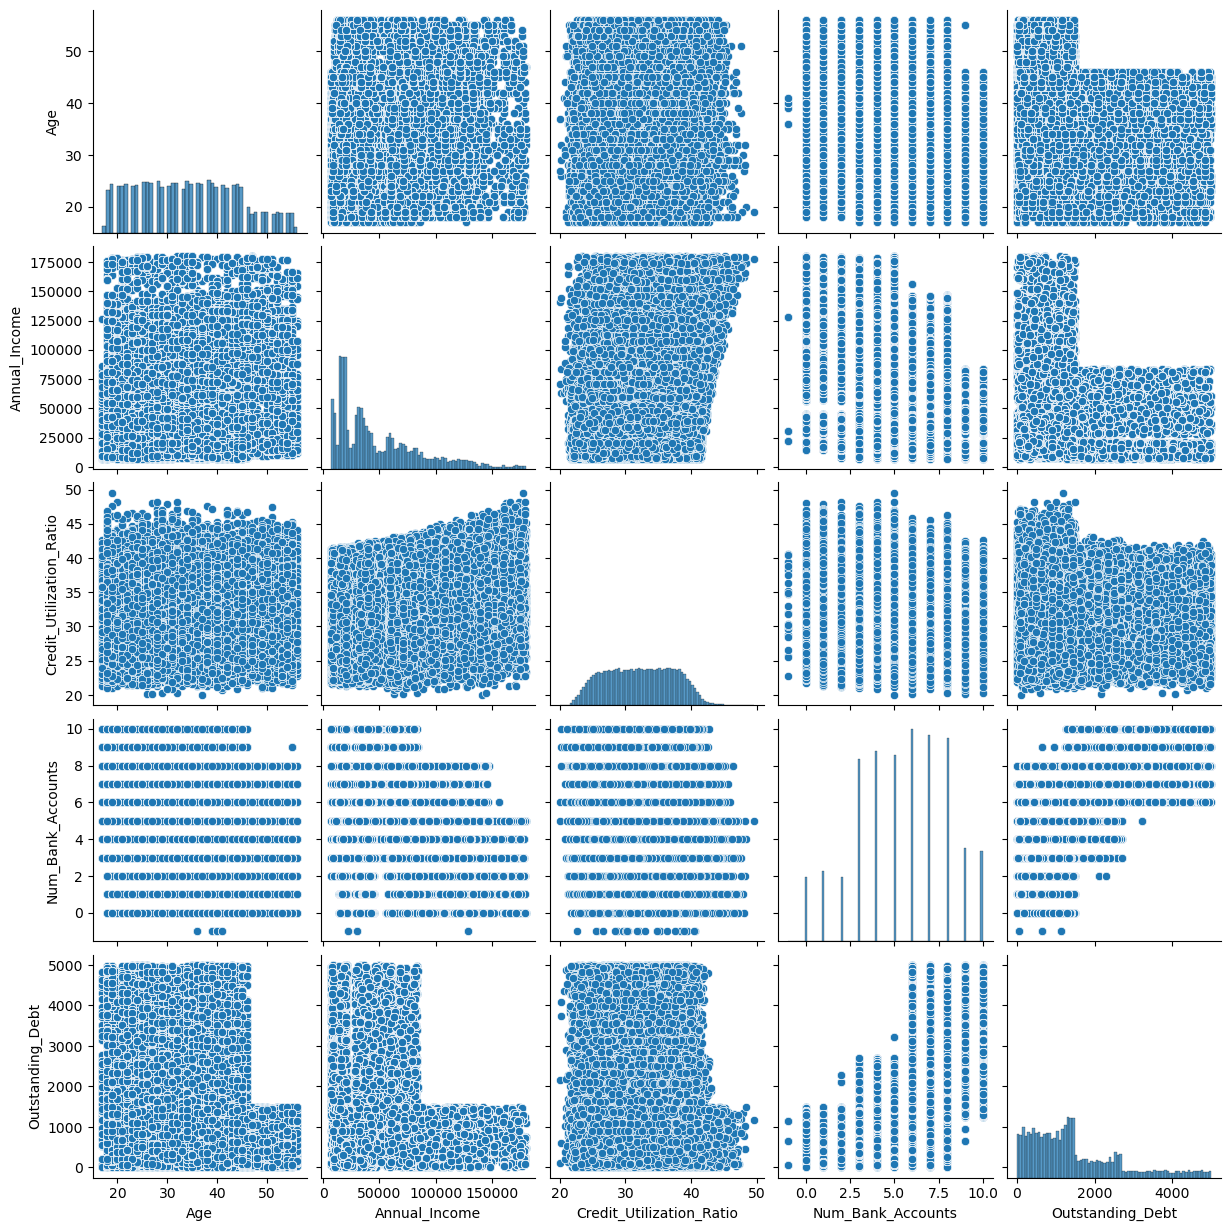

In [155]:
selected_features = ['Age', 'Annual_Income', 'Credit_Utilization_Ratio', 'Num_Bank_Accounts' , 'Outstanding_Debt']
sns.pairplot(credit_card[selected_features])
plt.savefig('Pair plot.png')
plt.show()

#### <span style = font-style:bold;color:blue>1. Many of the variables exhibit **`skewed distributions`**, with long tails towards higher values.<br>2. There appear to be some outliers or extreme values present, particularly for variables like income and outstanding debt.<br>3. The **`scatter plots`** suggest potential correlations or relationships between certain pairs of variables, such as age and income, credit utilization ratio and outstanding debt, etc.<br>4. The histograms allow for examining the density and shape of each variable's distribution individually.<br><span>

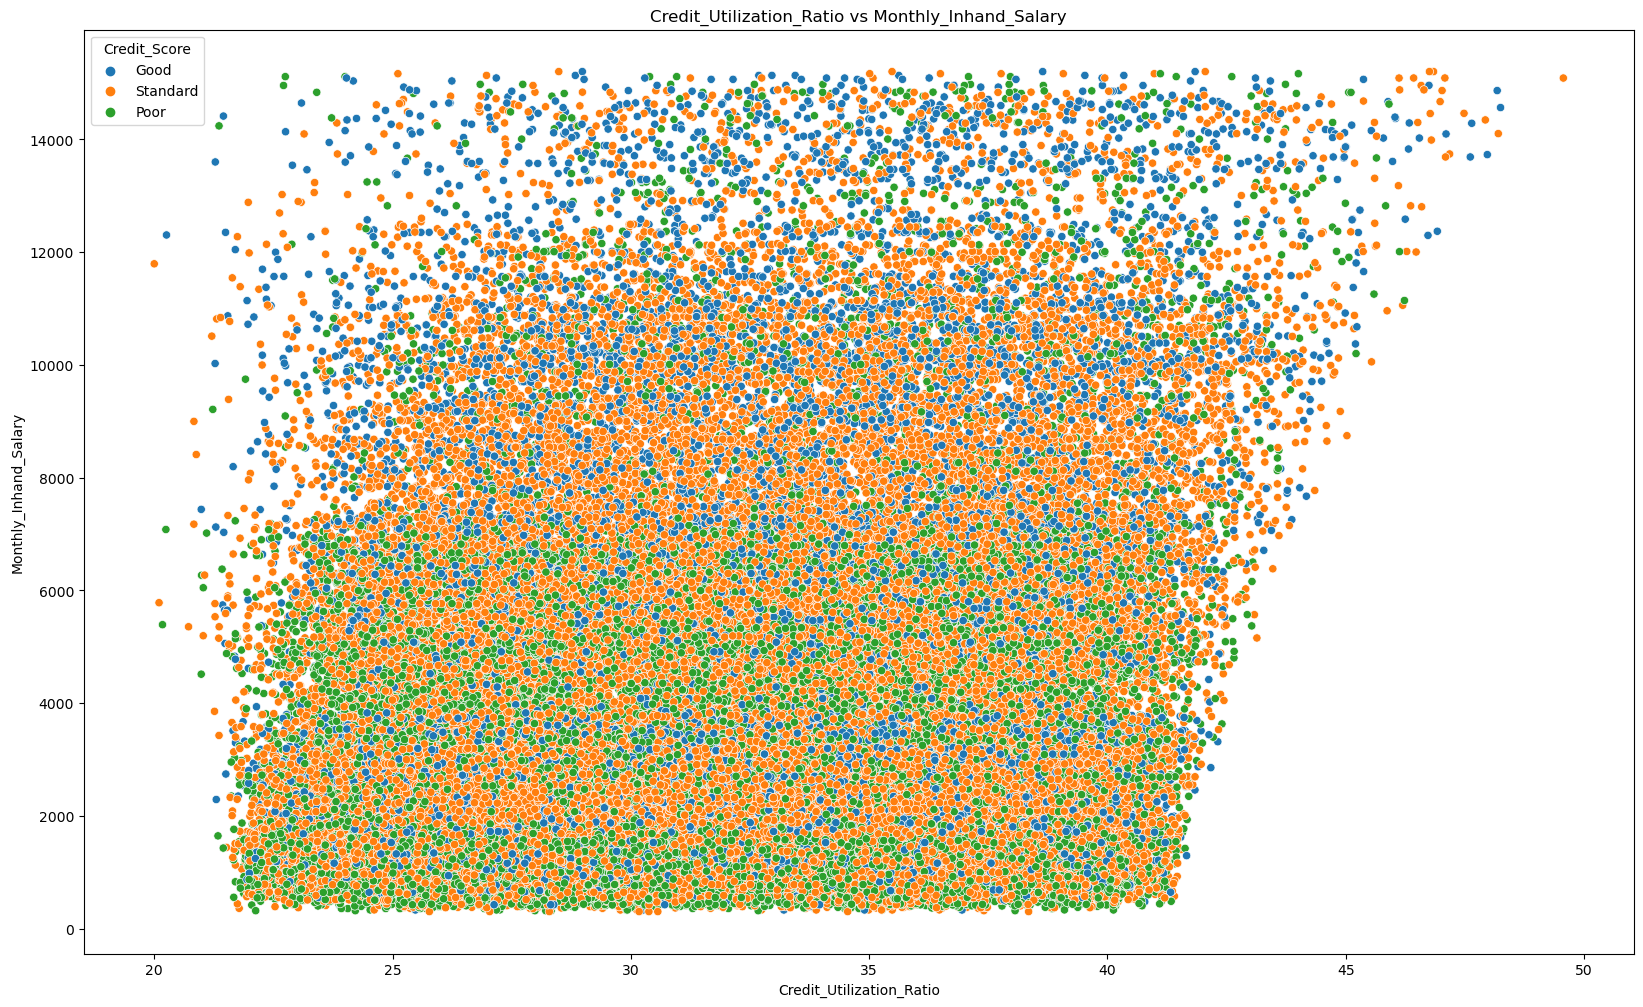

In [156]:
# Scatter plot for Age vs Monthly Inhand Salary
plt.figure(figsize=(20, 12))
sns.scatterplot(data=credit_card, x='Credit_Utilization_Ratio', y='Monthly_Inhand_Salary' , hue = 'Credit_Score')
plt.title('Credit_Utilization_Ratio vs Monthly_Inhand_Salary')
plt.xlabel('Credit_Utilization_Ratio')
plt.ylabel('Monthly_Inhand_Salary')
plt.savefig('Credit_Utilization_Ratio vs Monthly_Inhand_Salary.png')
plt.show()

#### <span style = font-style:bold;color:blue>here we can say that most of the people with **`Poor credit score lie below`** the salary range of 7000 USD and have the credit utilization ratio evenly spread between 22% to 41%.<span>

#### <span style = font-style:bold;color:blue>however we can also see that there is a **`person who is earning more than 14000 dollars`** and also has maximum utilization ratio of almost  49% and still have a standard credit score.<span>

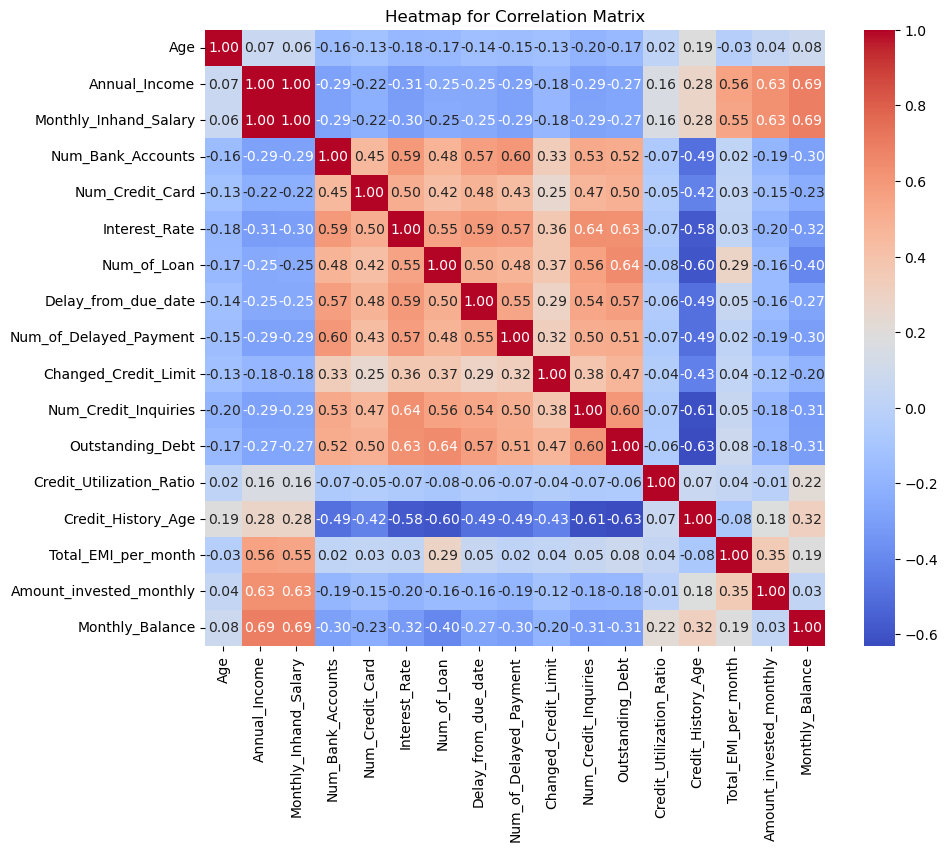

In [152]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(credit_card.corr(numeric_only= True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap for Correlation Matrix')
plt.savefig('Heatmap for Correlation Matrix.png')
plt.show()

* delay from due date and interest rate has 0.59
* interest rate and number on credit inquiries 0.64
* interest rate and outstanding debt 0.63
* no of delayed payments and interest rate has 0.57
* outstanding debt and no of credit enquires 0.60
* no of loans and no of credit enquiries 0.56
* Monthly balance and annual income 0.69
* Amount invested monthly and monthly inhand salary 0.63

#### <span style = font-style:bold;color:blue>From the heatmap , we can see the above columns have the high correlation as mentioned above<span>

<a id = "ot"></a>
# <span style = "font-style:italic;color:skyblue"> OUTLIER TREATMENT <span>

In [153]:
credit_card.shape

(83232, 24)

In [154]:
# Remove outliers
Q1 = credit_card.select_dtypes(np.number).quantile(0.25)
Q3 = credit_card.select_dtypes(np.number).quantile(0.75)
IQR = Q3 - Q1

In [155]:
credit_card[~((credit_card.select_dtypes(np.number) < (Q1 - 1.5 * IQR)) | (credit_card.select_dtypes(np.number) > (Q3 + 1.5 * IQR))).any(axis=1)]

Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
Customer_ID                                                                    
CUS_0xd40     January  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40    February  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40       March  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40       April  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40         May  23.0  Scientist       19114.12            1824.843333   
...               ...   ...        ...            ...                    ...   
CUS_0x942c      April  25.0   Mechanic       39628.99            3359.415833   
CUS_0x942c        May  25.0   Mechanic       39628.99            3359.415833   
CUS_0x942c       June  25.0   Mechanic       39628.99            3359.415833   
CUS_0x942c       July  25.0   Mechanic       39628.99            3359.415833   
CUS_0x942c     August  25.0   Mechanic       39628.99            3359.415833   

             Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Customer_ID                                                                   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
...                        ...              ...            ...          ...   
CUS_0x942c                   4                6              7          2.0   
CUS_0x942c                   4                6              7          2.0   
CUS_0x942c                   4                6              7          2.0   
CUS_0x942c                   4                6              7          2.0   
CUS_0x942c                   4                6              7          2.0   

                                                  Type_of_Loan  ...  \
Customer_ID                                                     ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
...                                                        ...  ...   
CUS_0x942c                         Auto Loan, and Student Loan  ...   
CUS_0x942c                         Auto Loan, and Student Loan  ...   
CUS_0x942c                         Auto Loan, and Student Loan  ...   
CUS_0x942c                         Auto Loan, and Student Loan  ...   
CUS_0x942c                         Auto Loan, and Student Loan  ...   

             Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
Customer_ID                                                           
CUS_0xd40          Good            809.98                 26.822620   
CUS_0xd40          Good            809.98                 31.944960   
CUS_0xd40          Good            809.98                 28.609352   
CUS_0xd40          Good            809.98                 31.377862   
CUS_0xd40          Good            809.98                 24.797347   
...                 ...               ...                       ...   
CUS_0x942c         Good            502.38                 34.663572   
CUS_0x942c         Good            502.38                 40.565631   
CUS_0x942c         Good            502.38                 41.255522   
CUS_0x942c         Good            502.38                 33.638208   
CUS_0x942c         Good            502.38                 34.192463   

             Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
Customer_ID          

In [156]:
#  we need to check the outliers in those numerical columns

In [157]:
credit_card.select_dtypes(np.number).columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

#### <span style = font-style:bold;color:blue>In  **`Age`** , **`Monthly_Inhand_Salary`** , **`Num_of_Loan`** , **`Num_of_Delayed_Payment`** , **`Changed_Credit_Limit`** , **`Num_Credit_Inquiries`** ,<span>

 #### <span style = font-style:bold;color:blue>**`Annual_Income`** , **`Number of bank account`** , **`Number of credit card`** , **`Interest rate`** , **`Total EMI per month`** , **`Outstanding_Debt`** and <span>

 #### <span style = font-style:bold;color:blue>**`Credit_History_Age`** columns we dont need to do outliers Treatment since we already did the data cleaning process and change the mismatch <span>

#### <span style = font-style:bold;color:blue>values into null values then grouped by Customer ID and filled the values with mode.<span>

#### <span style = font-style:bold;color:blue>In **`Amount_invested_monthly`** and **`Monthly_Balance`**columns we dont need to do outliers Treatment since we already did the data cleaning process and change the mismatch values then grouped by Customer ID and filled the values with `median`.<span>

#### <span style = font-style:bold;color:blue>In **`Credit_Utilization_Ratio`** column we dont need to do outliers Treatment since we can see only few outliers and those are not mismatch values so we can proceed with the column<span>

In [158]:
credit_card.Credit_Utilization_Ratio.describe()

count    83232.000000
mean        32.190629
std          5.081361
min         20.000000
25%         27.982419
50%         32.217040
75%         36.400121
max         49.564519
Name: Credit_Utilization_Ratio, dtype: float64

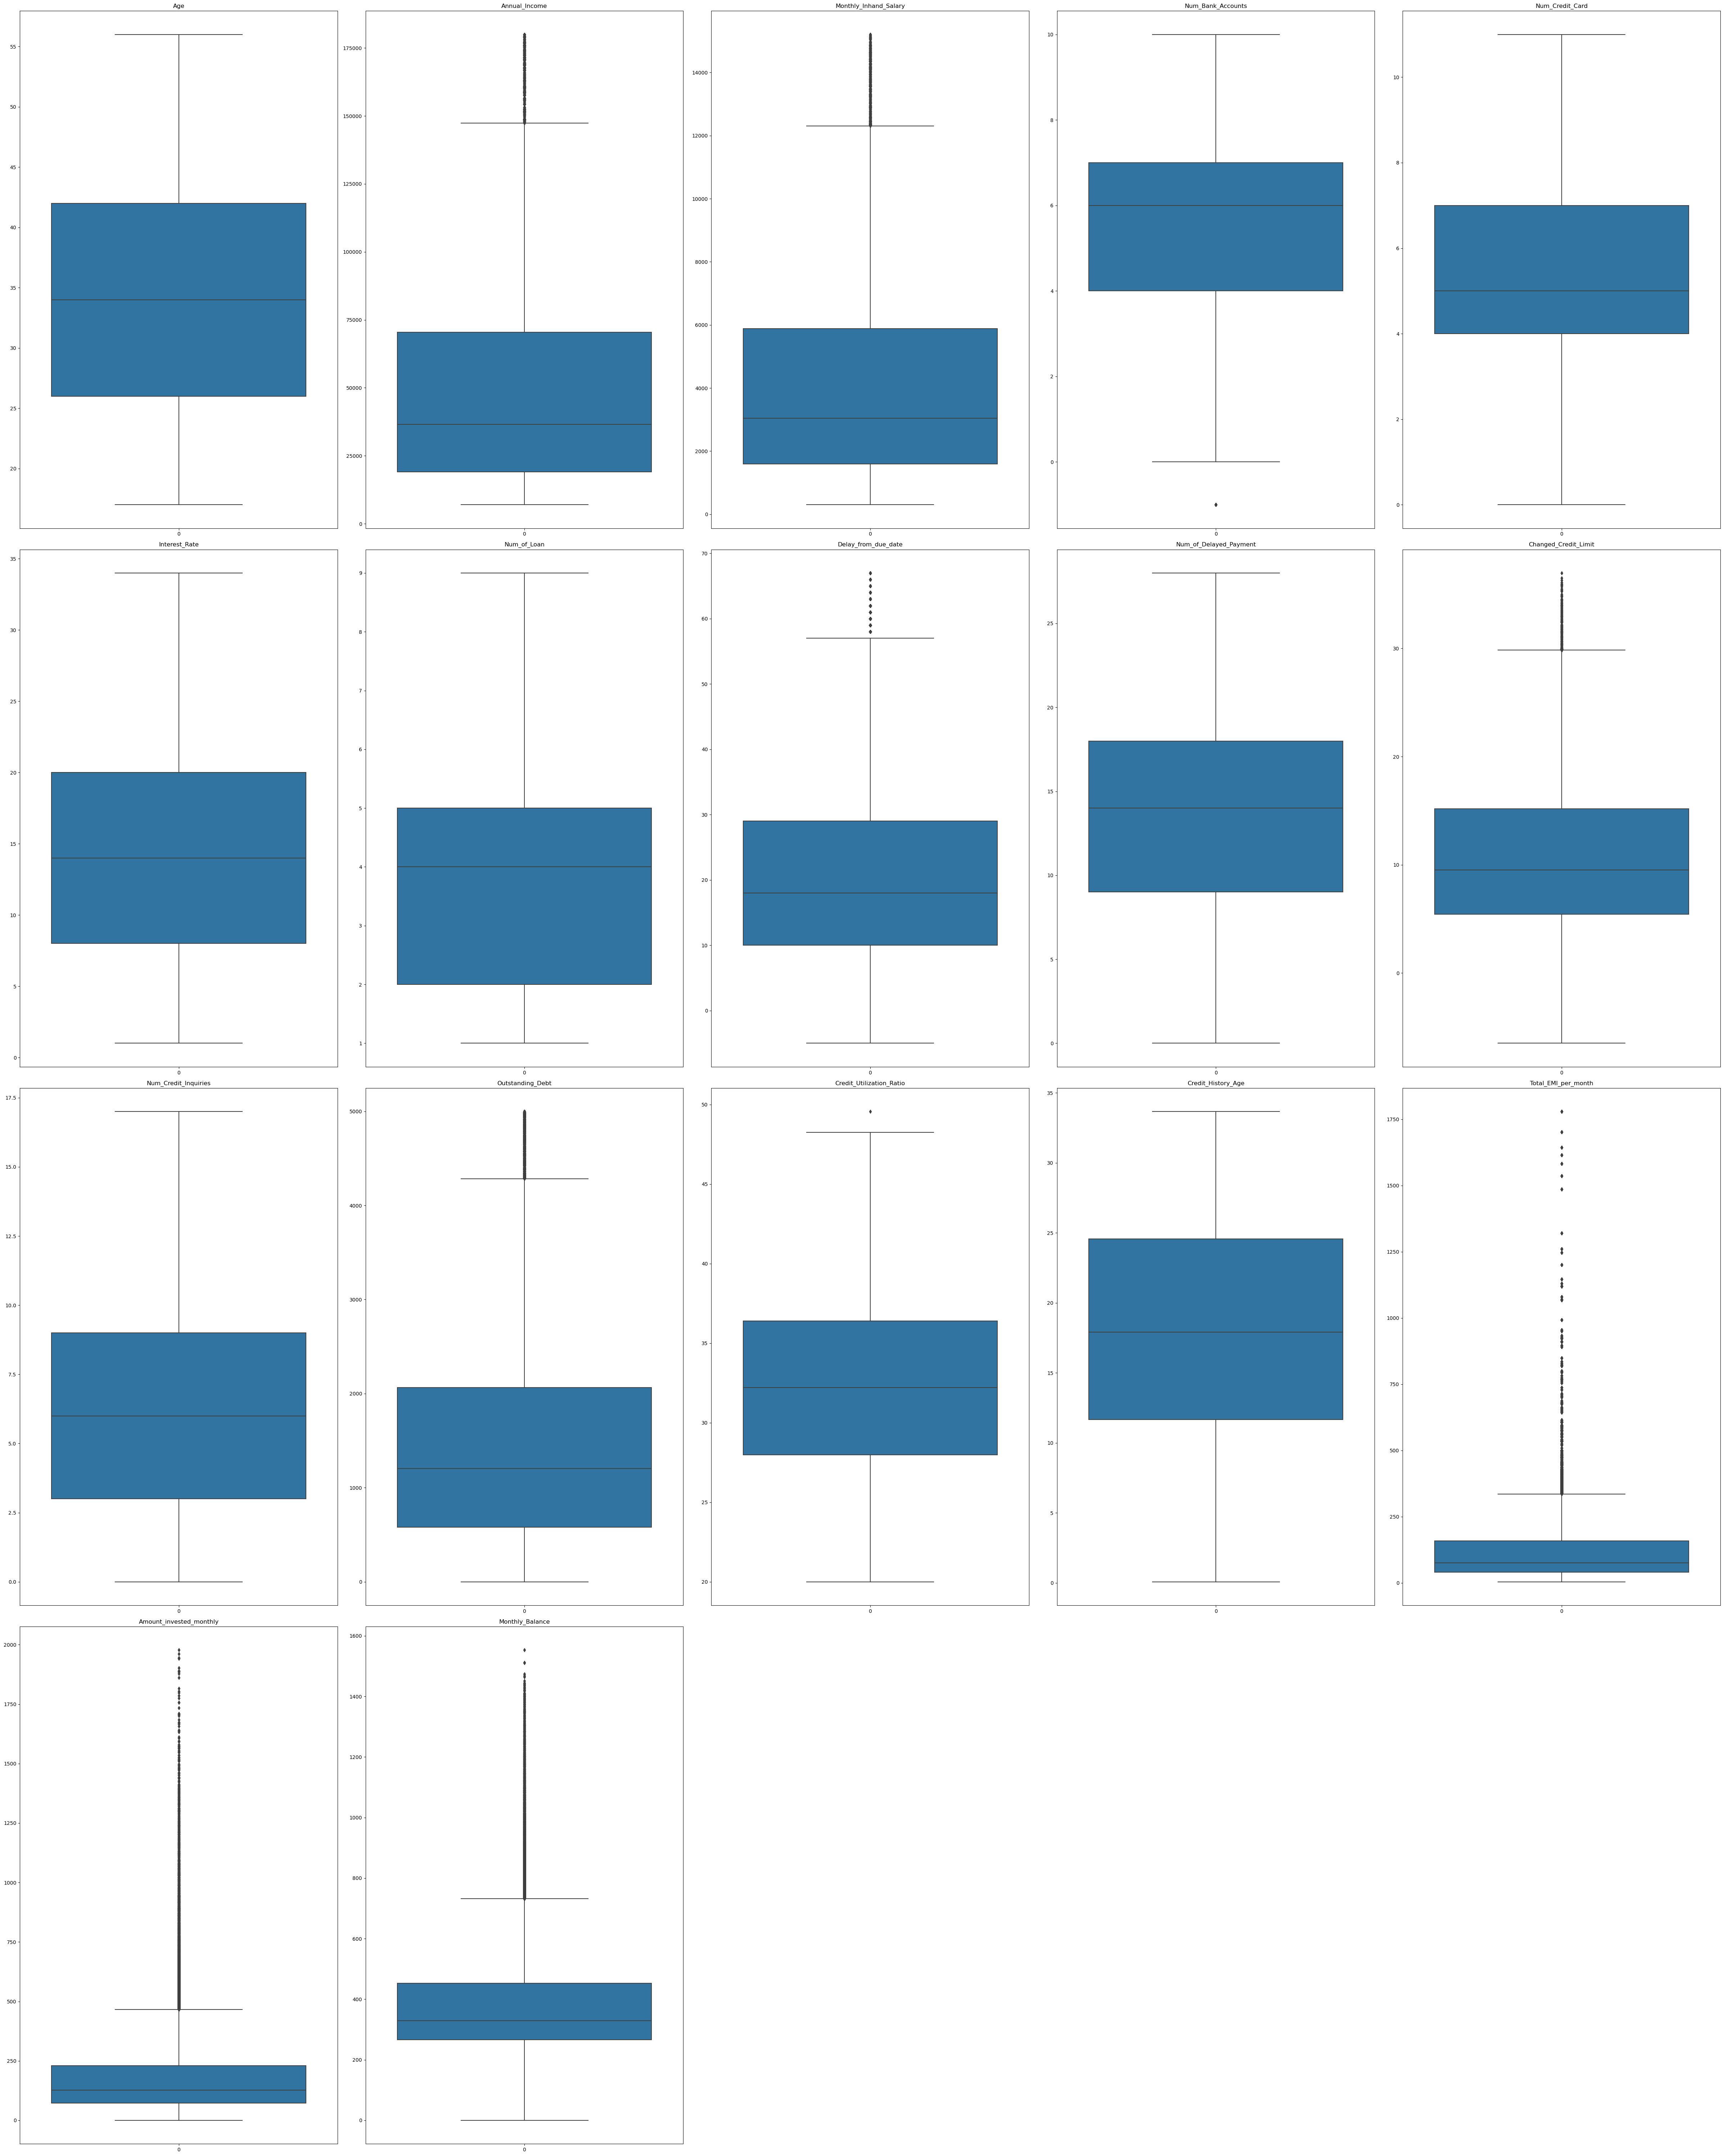

In [159]:
# box plot for all numberical columns for Visualize the outliers
plt.figure(figsize= [48,60])
t = 1
for i in credit_card.select_dtypes(np.number).columns:
    plt.subplot(4 , 5,t)
    sns.boxplot(credit_card[i])
    plt.title(i)
    t = t + 1
plt.tight_layout()
plt.savefig('box plot for numerical variables.png')
plt.show()

<a id = "sa"></a>
# <span style = "font-style:italic;color:skyblue"> STATISTICAL ANALYSIS : <span>

<a id = "de"></a>
## <span style = "font-style:italic;color:black"> DESCRIBE <span>

<span style = font-style:bold;color:blue>**`describe`**<span>:  we can gather the five point summary of all numeric columns.

In [160]:
credit_card.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  83232.000000   83232.000000           83232.000000       83232.000000   
mean      34.044502   49632.415358            4127.618425           5.449154   
std        9.982938   37923.586578            3158.158922           2.598371   
min       17.000000    7006.035000             303.645417          -1.000000   
25%       26.000000   19071.272500            1599.830000           4.000000   
50%       34.000000   36570.925000            3047.121667           6.000000   
75%       42.000000   70416.020000            5884.426667           7.000000   
max       56.000000  179987.280000           15204.633333          10.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count     83232.000000   83232.000000  83232.000000         83232.000000   
mean          5.589004      14.898693      3.909650            21.562584   
std           2.079613       8.830885      2.206551            15.117314   
min           0.000000       1.000000      1.000000            -5.000000   
25%           4.000000       8.000000      2.000000            10.000000   
50%           5.000000      14.000000      4.000000            18.000000   
75%           7.000000      20.000000      5.000000            29.000000   
max          11.000000      34.000000      9.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            83232.000000          83232.000000          83232.000000   
mean                13.528379             10.567041              5.923287   
std                  6.256076              6.888817              3.893238   
min                  0.000000             -6.490000              0.000000   
25%                  9.000000              5.420000              3.000000   
50%                 14.000000              9.520000              6.000000   
75%                 18.000000             15.190000              9.000000   
max                 28.000000             36.970000             17.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count      83232.000000              83232.000000        83232.000000   
mean        1472.830794                 32.190629           18.069397   
std         1181.038111                  5.081361            8.288886   
min            0.230000                 20.000000            0.083333   
25%          582.257500                 27.982419           11.666667   
50%         1202.415000                 32.217040           17.916667   
75%         2063.582500                 36.400121           24.583333   
max         4998.070000                 49.564519           33.666667   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count         83232.000000             83232.000000     83232.000000  
mean            116.072335               191.003290       388.270455  
std             120.507537               193.078372       200.238828  
min               4.462837                 0.000000         0.007760  
25%              40.150347                72.719614       266.251575  
50%              75.463962               127.475601       328.635400  
75%             158.493835               230.311263       452.601054  
max            1779.103254              1977.326102      1552.946094

<span style = font-style:bold;color:blue>**`describe(include = 'object')`**<span> : we can gather the five point summary of all categorical columns

In [161]:
credit_card.describe(include= 'object')

Month Occupation   Type_of_Loan Credit_Mix Payment_of_Min_Amount  \
count     83232      83232          83232      83232                 83232   
unique        8         15           5782          3                     3   
top     January     Lawyer  Not Specified   Standard                   Yes   
freq      10404       6040           1392      37888                 44803   

                     Payment_Behaviour Credit_Score  
count                            83232        83232  
unique                               6            3  
top     Low_spent_Small_value_payments     Standard  
freq                             23461        43826

<a id = "sk"></a>
## <span style = "font-style:italic;color:black"> SKEWNESS <span>

In [162]:
credit_card.skew(numeric_only = True)

Age                         0.218938
Annual_Income               1.161364
Monthly_Inhand_Salary       1.159198
Num_Bank_Accounts          -0.212570
Num_Credit_Card             0.218855
Interest_Rate               0.436352
Num_of_Loan                 0.612450
Delay_from_due_date         0.925397
Num_of_Delayed_Payment     -0.214582
Changed_Credit_Limit        0.631964
Num_Credit_Inquiries        0.355136
Outstanding_Debt            1.136489
Credit_Utilization_Ratio    0.015032
Credit_History_Age          0.000310
Total_EMI_per_month         3.648857
Amount_invested_monthly     2.617989
Monthly_Balance             1.574175
dtype: float64

<span style = font-style:bold;color:blue>we can see that the **`skewness`** of `total EMI per month` is greater and we can infer that it is positively skewed<span>

<a id = "ku"></a>
## <span style = "font-style:italic;color:black"> KURTOSIS <span>

In [163]:
credit_card.kurtosis(numeric_only = True)

Age                         -0.896842
Annual_Income                0.723487
Monthly_Inhand_Salary        0.731848
Num_Bank_Accounts           -0.681799
Num_Credit_Card             -0.375751
Interest_Rate               -0.766961
Num_of_Loan                 -0.505801
Delay_from_due_date          0.201102
Num_of_Delayed_Payment      -0.662796
Changed_Credit_Limit         0.049595
Num_Credit_Inquiries        -0.675717
Outstanding_Debt             0.667464
Credit_Utilization_Ratio    -0.973051
Credit_History_Age          -0.895320
Total_EMI_per_month         27.199308
Amount_invested_monthly      9.326040
Monthly_Balance              3.004330
dtype: float64

<span style = font-style:bold;color:blue>we can see that the **`Kurtosis`** of `total EMI per month` looks high peakness and we can infer that it is positively skewed

<a id = "hyp"></a>
## <span style = "font-style:italic;color:black"> HYPOTHESIS TESTING <span>

In [164]:
credit_card.dtypes

Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

#### Normality testing

In [165]:
shapiro_results = {}

# Loop through columns and perform Shapiro test for float and integer columns
for col in credit_card.columns:
    if credit_card[col].dtype in ['float64', 'int64']:
        _, p_value = shapiro(credit_card[col])
        shapiro_results[col] = p_value

# Set significance level
alpha = 0.05

# Print the Shapiro test results and make inferences
for col, p_value in shapiro_results.items():
    if p_value < alpha:
        print(f"Shapiro test p-value for column '{col}' is {p_value}, which is less than {alpha}, reject the null hypothesis.")
    else:
        print(f"Shapiro test p-value for column '{col}' is {p_value}, which is greater than or equal to {alpha}, fail to reject the null hypothesis.")

Shapiro test p-value for column 'Age' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Annual_Income' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Monthly_Inhand_Salary' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Num_Bank_Accounts' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Num_Credit_Card' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Interest_Rate' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Num_of_Loan' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Delay_from_due_date' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Num_of_Delayed_Payment' is 0.0, which is less than 0.05, reject the null hypothesis.
Sh

#### variables testing

In [166]:
numerical_data = credit_card.select_dtypes(include= np.number)

levene_results = {}

# Loop through columns and perform Levene test for float and integer columns
for col in numerical_data.columns:
    # Perform the Levene test
    statistic, p_value = levene(
        numerical_data[credit_card['Credit_Score'] == 'Good'][col],
        numerical_data[credit_card['Credit_Score'] == 'Standard'][col],
        numerical_data[credit_card['Credit_Score'] == 'Poor'][col]
    )
    
    levene_results[col] = p_value

# Set significance level
alpha = 0.05

# Print the Levene test results and make inferences
for col, p_value in levene_results.items():
    if p_value < alpha:
        print(f"Levene test p-value for column '{col}' is {p_value}, which is less than {alpha}, reject the null hypothesis.")
    else:
        print(f"Levene test p-value for column '{col}' is {p_value}, which is greater than or equal to {alpha}, fail to reject the null hypothesis.")

Levene test p-value for column 'Age' is 1.3207704979550241e-220, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Annual_Income' is 0.0, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Monthly_Inhand_Salary' is 0.0, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Num_Bank_Accounts' is 8.449246192103242e-27, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Num_Credit_Card' is 1.480329519617793e-66, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Interest_Rate' is 0.0, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Num_of_Loan' is 0.0, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Delay_from_due_date' is 0.0, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Num_of_Delayed_Payment' is 1.14513695038

In [167]:
# Assuming 'credit_score' is your target variable and 'creditcard' is your DataFrame

# List of categorical columns
categorical_columns = credit_card.select_dtypes(exclude= np.number).columns

# Perform chi-square test for each categorical variable
chi2_results = {}

for col in categorical_columns:
    contingency_table = pd.crosstab(credit_card[col], credit_card['Credit_Score'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2_statistic': chi2_stat, 'p_value': p_value}

# Set significance level
alpha = 0.05

# Print chi-square test results and make inferences
for col, result in chi2_results.items():
    if result['p_value'] < alpha:
        print(f"Chi-square test p-value for column '{col}' is {result['p_value']}, which is less than {alpha}, reject the null hypothesis.")
    else:
        print(f"Chi-square test p-value for column '{col}' is {result['p_value']}, which is greater than or equal to {alpha}, fail to reject the null hypothesis.")

Chi-square test p-value for column 'Month' is 9.235004202548116e-25, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'Occupation' is 3.2920325760557713e-19, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'Type_of_Loan' is 0.0, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'Credit_Mix' is 0.0, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'Payment_of_Min_Amount' is 0.0, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'Payment_Behaviour' is 1.4195267098226385e-272, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'Credit_Score' is 0.0, which is less than 0.05, reject the null hypothesis.


In [168]:
# numerical Data
numerical_data = credit_card.select_dtypes(include= np.number)

# Define a dictionary to store the ANOVA results for each numerical column
anova_results = {}

# Perform ANOVA test for each numerical column
for col in numerical_data.columns:
    # Perform the ANOVA test
    statistic, p_value = f_oneway(
        numerical_data[credit_card['Credit_Score'] == 'Good'][col],
        numerical_data[credit_card['Credit_Score'] == 'Standard'][col],
        numerical_data[credit_card['Credit_Score'] == 'Poor'][col]
    )
    
    # Store the p-value in the dictionary
    anova_results[col] = p_value

# Set significance level
alpha = 0.05

# Print the ANOVA test results and make inferences
for col, p_value in anova_results.items():
    if p_value < alpha:
        print(f"ANOVA test p-value for column '{col}' is {p_value}, which is less than {alpha}, reject the null hypothesis.")
    else:
        print(f"ANOVA test p-value for column '{col}' is {p_value}, which is greater than or equal to {alpha}, fail to reject the null hypothesis.")

ANOVA test p-value for column 'Age' is 3.665e-320, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Annual_Income' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Monthly_Inhand_Salary' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Num_Bank_Accounts' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Num_Credit_Card' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Interest_Rate' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Num_of_Loan' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Delay_from_due_date' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Num_of_Delayed_Payment' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-

In [169]:
# Define your target variable
target_variable = "Credit_Score"

# Define a list to store the results
tukey_results = []

# Iterate over each numerical column
for col in numerical_data.columns:
    # Combine data and generate labels
    data = numerical_data[col]
    labels = credit_card[target_variable]
    
    # Perform Tukey's HSD test
    mc = MultiComparison(data, groups=labels)
    post_hoc = mc.tukeyhsd()
    
    # Store the results
    tukey_results.append((col, post_hoc))

# Print the summary of each Tukey's HSD test
for col, result in tukey_results:
    print(f"Tukey's HSD test results for column '{col}':")
    print(result.summary())
    print()

Tukey's HSD test results for column 'Age':
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj  lower   upper  reject
-----------------------------------------------------
  Good     Poor  -3.9663   0.0 -4.2097  -3.723   True
  Good Standard  -2.1941   0.0  -2.418 -1.9701   True
  Poor Standard   1.7723   0.0   1.589  1.9556   True
-----------------------------------------------------

Tukey's HSD test results for column 'Annual_Income':
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1  group2    meandiff  p-adj    lower       upper    reject
----------------------------------------------------------------
  Good     Poor -25270.6203   0.0 -26180.3482 -24360.8924   True
  Good Standard -15073.6313   0.0 -15910.8753 -14236.3872   True
  Poor Standard  10196.9891   0.0   9511.7011   10882.277   True
----------------------------------------------------------------

Tukey's HSD test results for column 'Monthly_Inhand_Salary':
     Mul

#### <span style = font-style:bold;color:blue>All the statistical tests namely, **`shapiro`**, **`levene`**,**`ANOVA`**,**`chi_square`** are failing our assumption, but we proceed on to model building with sci-kit learn school of thought.<span>

<a id = "mbd"></a>
# <span style = "font-style:italic;color:skyblue"> MODEL BUILDING : <span>

<a id = "etv"></a>
## <span style = "font-style:italic;color:black"> ENCODING TARGET VARIABLE <span>

In [170]:
encoding_mapping = {"Good": 1, "Standard": 2, "Poor": 3}

# Replace the original values with the encoded values
credit_card['Credit_Score'] = credit_card['Credit_Score'].map(encoding_mapping)

# Print the encoded target variable
print("after Encoded target variable:")
credit_card.head()

after Encoded target variable:


Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
Customer_ID                                                                    
CUS_0xd40     January  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40    February  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40       March  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40       April  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40         May  23.0  Scientist       19114.12            1824.843333   

             Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Customer_ID                                                                   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   

                                                  Type_of_Loan  ...  \
Customer_ID                                                     ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   

             Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
Customer_ID                                                           
CUS_0xd40          Good            809.98                 26.822620   
CUS_0xd40          Good            809.98                 31.944960   
CUS_0xd40          Good            809.98                 28.609352   
CUS_0xd40          Good            809.98                 31.377862   
CUS_0xd40          Good            809.98                 24.797347   

             Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
Customer_ID                                                                  
CUS_0xd40             22.083333                    No            49.574949   
CUS_0xd40             22.166667                    No            49.574949   
CUS_0xd40             22.250000                    No            49.574949   
CUS_0xd40             22.333333                    No            49.574949   
CUS_0xd40             22.416667                    No            49.574949   

             Amount_invested_monthly                 Payment_Behaviour  \
Customer_ID                                                              
CUS_0xd40                  80.415295   High_spent_Small_value_payments   
CUS_0xd40                 118.280222    Low_spent_Large_value_payments   
CUS_0xd40                  81.699521   Low_spent_Medium_value_payments   
CUS_0xd40                 199.458074    Low_spent_Small_value_payments   
CUS_0xd40                  41.420153  High_spent_Medium_value_payments   

            Monthly_Balance  Credit_Score  
Customer_ID                                
CUS_0xd40        312.494089             1  
CUS_0xd40        284.629162             1  
CUS_0xd40        331.209863             1  
CUS_0xd40        223.451310             1  
CUS_0xd40        341.489231             1  

[5 rows x 24 columns]

<a id = "dcl"></a>
## <span style = "font-style:italic;color:black"> DROP UNNECESSARY COLUMNS <span>

In [171]:
credit_card.dtypes

Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [172]:
credit_card.drop(columns=['Month' , 'Occupation' , 'Type_of_Loan' , 'Credit_Mix'] , inplace = True)

In [173]:
credit_card.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

<a id = "ecc"></a>
## <span style = "font-style:italic;color:black"> ENCODING CATEGORICAL COLUMNS <span>

In [174]:
categorical_columns = credit_card.select_dtypes(exclude= np.number).columns

In [175]:
# Creating the categorical columns for encoding process
categorical_columns

Index(['Payment_of_Min_Amount', 'Payment_Behaviour'], dtype='object')

In [176]:
# Use one-hot encoding to encode categorical columns
encoded_data = pd.get_dummies(credit_card, columns=categorical_columns, drop_first=True , dtype= int)

# Define your features (X) and target variable (y)
X = encoded_data.drop(columns=['Credit_Score'])  # Assuming 'target_variable' is your target column
y = credit_card['Credit_Score']  # Assuming 'target_variable' is your target column

<a id = "bml"></a>
## <span style = "font-style:italic;color:black"> TRAIN TEST SPLIT <span>

In [177]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify= y)

<a id = "bml"></a>
## <span style = "font-style:italic;color:black"> SCALING <span>

In [190]:
sc = StandardScaler()

sc.fit_transform(X_train)
scaled_data = sc.transform(X_test)
scaled_data = pd.DataFrame(X_train , columns= X_train.columns)

scaled_data.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
Customer_ID                                                                  
CUS_0x48be   44.0       19927.48            1655.623333                 10   
CUS_0xa690   28.0       19852.32            1413.360000                  7   
CUS_0x496a   25.0       18854.60            1627.216667                  8   
CUS_0x1638   27.0       32370.60            2862.550000                  7   
CUS_0xc668   42.0       17420.33            1698.694167                  4   

             Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
Customer_ID                                                                     
CUS_0x48be                 6             24          9.0                   27   
CUS_0xa690                 8             29          6.0                   40   
CUS_0x496a                 9             27          6.0                   58   
CUS_0x1638                10             32          5.0                   61   
CUS_0xc668                 7             27          3.0                   29   

             Num_of_Delayed_Payment  Changed_Credit_Limit  ...  \
Customer_ID                                                ...   
CUS_0x48be                     19.0                  9.42  ...   
CUS_0xa690                     18.0                  2.98  ...   
CUS_0x496a                     17.0                 13.42  ...   
CUS_0x1638                     22.0                  6.03  ...   
CUS_0xc668                      8.0                  8.30  ...   

             Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  \
Customer_ID                                                                  
CUS_0x48be            125.749798                89.402362       210.410173   
CUS_0xa690             52.930743                17.216440       321.188817   
CUS_0x496a             60.160868               151.261935       241.298863   
CUS_0x1638             74.738027                84.975904       376.541070   
CUS_0xc668             24.131972                22.885123       372.852322   

             Payment_of_Min_Amount_No  Payment_of_Min_Amount_Yes  \
Customer_ID                                                        
CUS_0x48be                          0                          0   
CUS_0xa690                          0                          1   
CUS_0x496a                          0                          1   
CUS_0x1638                          0                          1   
CUS_0xc668                          0                          1   

             Payment_Behaviour_High_spent_Medium_value_payments  \
Customer_ID                                                       
CUS_0x48be                                                   0    
CUS_0xa690                                                   1    
CUS_0x496a                                                   0    
CUS_0x1638                                                   1    
CUS_0xc668                                                   1    

             Payment_Behaviour_High_spent_Small_value_payments  \
Customer_ID                                                      
CUS_0x48be                                                   1   
CUS_0xa690                                                   0   
CUS_0x496a                                                   0   
CUS_0x1638                                                   0   
CUS_0xc668                                                   0   

             Payment_Behaviour_Low_spent_Large_value_payments  \
Customer_ID                                                     
CUS_0x48be                                                  0   
CUS_0xa690                                                  0   
CUS_0x496a                                                  0   
CUS_0x1638                                                  0   
CUS_0xc668                                                  0   

             Payment_Be

<a id = "bml"></a>
## <span style = "font-style:italic;color:black"> BASIC MODEL <span>

In [191]:
# Initialize the Random  Forest classifier
classifier = KNeighborsClassifier(n_neighbors=5)
# Fit the model to the training data
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [192]:
# Obtain predictions on the testing data
y_pred = classifier.predict(X_test.values)

In [193]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.65      0.65      2839
           2       0.78      0.77      0.77      8766
           3       0.77      0.79      0.78      5042

    accuracy                           0.75     16647
   macro avg       0.73      0.74      0.73     16647
weighted avg       0.76      0.75      0.75     16647



#### <span style = font-style:bold;color:blue>**`Inference:`**<br>**`1`**. The model demonstrates good performance overall with an accuracy of 75%.<br>**`2`**. Class 3 has the highest precision, recall, and F1-score, indicating that the model performs well in predicting this class.<br>**`3`**. Class 2 has slightly lower precision, recall, and F1-score compared to Class 2, but still maintains reasonable performance.<br>**`4`**. Class 1 also shows good precision, recall, and F1-score, indicating satisfactory performance.<br>**`5`**. The macro average F1-score is 0.75, suggesting that the model's performance is consistent across all classes.<br>**`6`**. The weighted average F1-score is also 0.75, indicating that the model's performance is slightly influenced by class imbalances, with more weight given to classes with larger support.<br>**`7`**. Overall, the model appears to be effective in classifying instances into the three classes, with balanced performance across multiple metrics. However, further analysis and possibly model optimization could be considered depending on specific requirements and objectives.<span>